# Modelos de Machine Learning - Wine Quality

## 1️⃣ Importación de Librerías

In [1]:
import sys
import os
import warnings

# Obtener la ruta absoluta del directorio raíz del proyecto
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Agregar la carpeta scripts al path
sys.path.append(os.path.join(project_root, "scripts"))
from load_processed_data import load_processed_data # type: ignore
from evaluate_model import evaluate_model # type: ignore
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

## 2️⃣ Carga de Datos

In [2]:
# Cargar los datos preprocesados
X_train, X_test, y_train, y_test = load_processed_data()

# Verificar la forma de los datos
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Distribución de clases en y_train:\n{y_train.value_counts(normalize=True)}")

✅ Datos preprocesados cargados correctamente.
Dimensiones de X_train: (4547, 15)
Dimensiones de X_test: (1950, 15)
Distribución de clases en y_train:
quality_label
medium    0.436552
low       0.366835
high      0.196613
Name: proportion, dtype: float64


## 3️⃣ Entrenar modelos

In [3]:
from sklearn.impute import SimpleImputer

# Imputar los valores faltantes en X_train y X_test
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

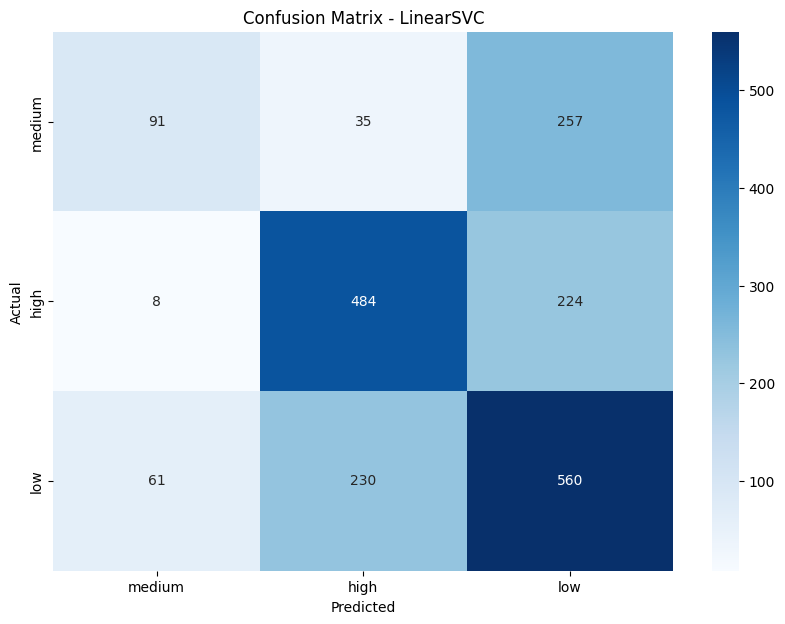


🔹 Reporte de Clasificación:
               precision    recall  f1-score   support

      medium       0.57      0.24      0.34       383
        high       0.65      0.68      0.66       716
         low       0.54      0.66      0.59       851

    accuracy                           0.58      1950
   macro avg       0.58      0.52      0.53      1950
weighted avg       0.58      0.58      0.57      1950

✅ Resultados de LinearSVC: {'Accuracy': 0.5820512820512821, 'Precision': 0.5837422581529513, 'Recall': 0.5820512820512821, 'F1-Score': 0.5667860675993024}


In [4]:
# Definir el modelo optimizado para clasificación multiclase
model_svm = LinearSVC(C=1.0, random_state=42, max_iter=5000)

# Entrenar el modelo
model_svm.fit(X_train_imputed, y_train)

# Convertir las etiquetas a cadenas de texto
labels = [str(label) for label in y_train.unique().tolist()]

# Evaluar el modelo
results_svm = evaluate_model(model_svm, X_test_imputed, y_test, labels=labels)
print("✅ Resultados de LinearSVC:", results_svm)

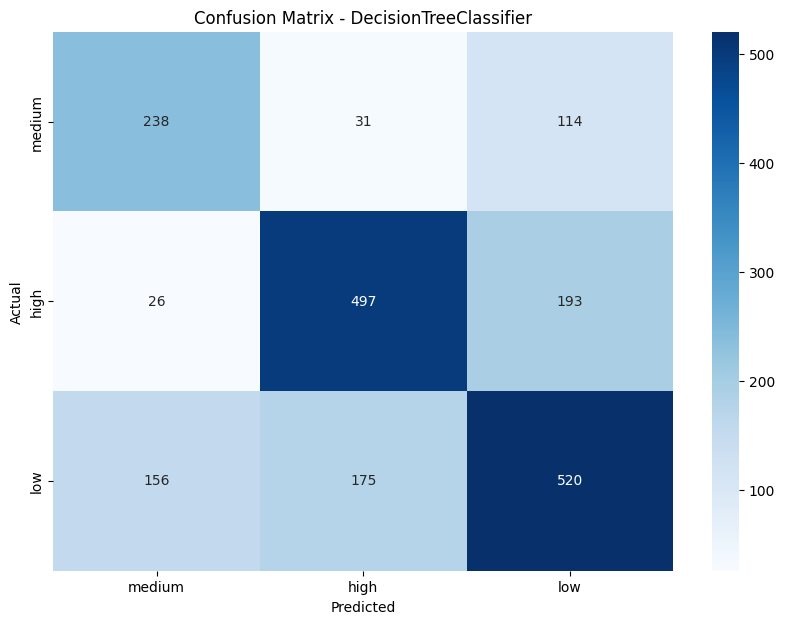


🔹 Reporte de Clasificación:
               precision    recall  f1-score   support

      medium       0.57      0.62      0.59       383
        high       0.71      0.69      0.70       716
         low       0.63      0.61      0.62       851

    accuracy                           0.64      1950
   macro avg       0.63      0.64      0.64      1950
weighted avg       0.65      0.64      0.64      1950

✅ Resultados Decision Tree: {'Accuracy': 0.6435897435897436, 'Precision': 0.6452895560183792, 'Recall': 0.6435897435897436, 'F1-Score': 0.6441150030258106}


In [5]:
# Modelo Árbol de Decisión
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
results_dt = evaluate_model(model_dt, X_test_imputed, y_test, labels=labels)
print("✅ Resultados Decision Tree:", results_dt)

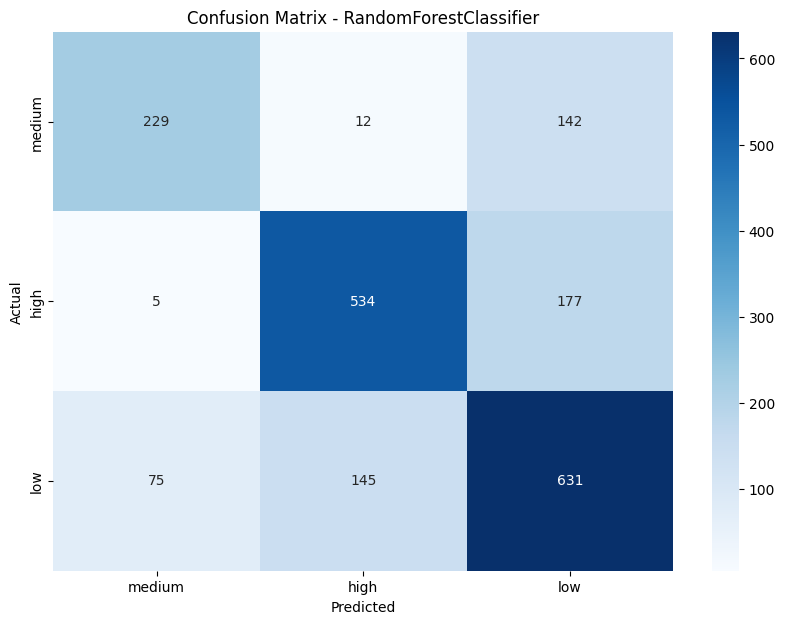


🔹 Reporte de Clasificación:
               precision    recall  f1-score   support

      medium       0.74      0.60      0.66       383
        high       0.77      0.75      0.76       716
         low       0.66      0.74      0.70       851

    accuracy                           0.71      1950
   macro avg       0.73      0.70      0.71      1950
weighted avg       0.72      0.71      0.71      1950

✅ Resultados Random Forest: {'Accuracy': 0.7148717948717949, 'Precision': 0.7191817477854342, 'Recall': 0.7148717948717949, 'F1-Score': 0.7145081959372053}


In [6]:
# Modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
results_rf = evaluate_model(model_rf, X_test, y_test, labels=labels)
print("✅ Resultados Random Forest:", results_rf)

## 4️⃣ Comparación de Modelos - Métricas Clave

In [7]:
# Crear DataFrame con los resultados obtenidos
model_results = pd.DataFrame({
    "Modelo": ["LinearSVC", "Decision Tree", "Random Forest"],
    "Accuracy": [results_svm["Accuracy"], results_dt["Accuracy"], results_rf["Accuracy"]],
    "F1-Score": [results_svm["F1-Score"], results_dt["F1-Score"], results_rf["F1-Score"]],
    "Precision": [results_svm["Precision"], results_dt["Precision"], results_rf["Precision"]],
    "Recall": [results_svm["Recall"], results_dt["Recall"], results_rf["Recall"]]
})

# Ordenar por mejor Accuracy
model_results = model_results.sort_values(by="Accuracy", ascending=False)
print("📊 Resultados finales:")
print(model_results)

📊 Resultados finales:
          Modelo  Accuracy  F1-Score  Precision    Recall
2  Random Forest  0.714872  0.714508   0.719182  0.714872
1  Decision Tree  0.643590  0.644115   0.645290  0.643590
0      LinearSVC  0.582051  0.566786   0.583742  0.582051


## 5️⃣ Modelos Avanzados: LightGBM y Redes Neuronales

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2408
[LightGBM] [Info] Number of data points in the train set: 4547, number of used features: 15
[LightGBM] [Info] Start training from score -1.626517
[LightGBM] [Info] Start training from score -1.002842
[LightGBM] [Info] Start training from score -0.828849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

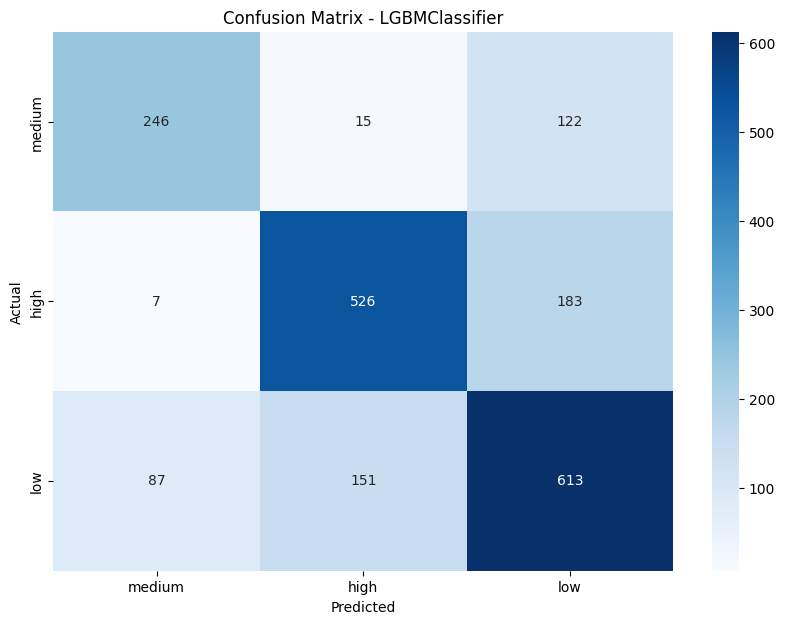


🔹 Reporte de Clasificación:
               precision    recall  f1-score   support

      medium       0.72      0.64      0.68       383
        high       0.76      0.73      0.75       716
         low       0.67      0.72      0.69       851

    accuracy                           0.71      1950
   macro avg       0.72      0.70      0.71      1950
weighted avg       0.71      0.71      0.71      1950

✅ Resultados LightGBM: {'Accuracy': 0.7102564102564103, 'Precision': 0.7126230194134535, 'Recall': 0.7102564102564103, 'F1-Score': 0.7104510475349369}


In [8]:
# LightGBM
model_lgbm = LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
model_lgbm.fit(X_train, y_train)
results_lgbm = evaluate_model(model_lgbm, X_test, y_test, labels=labels)
print("✅ Resultados LightGBM:", results_lgbm)

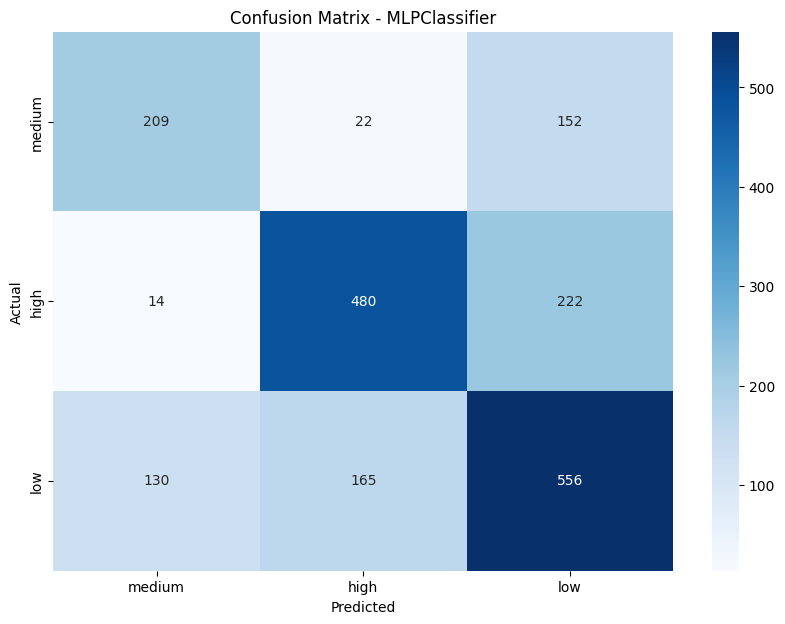


🔹 Reporte de Clasificación:
               precision    recall  f1-score   support

      medium       0.59      0.55      0.57       383
        high       0.72      0.67      0.69       716
         low       0.60      0.65      0.62       851

    accuracy                           0.64      1950
   macro avg       0.64      0.62      0.63      1950
weighted avg       0.64      0.64      0.64      1950

✅ Resultados MLPClassifier: {'Accuracy': 0.6384615384615384, 'Precision': 0.6414329748455216, 'Recall': 0.6384615384615384, 'F1-Score': 0.6389040924110866}


In [9]:
# Red Neuronal (MLPClassifier)
model_mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=500, random_state=42)
model_mlp.fit(X_train_imputed, y_train)
results_mlp = evaluate_model(model_mlp, X_test_imputed, y_test, labels=labels)
print("✅ Resultados MLPClassifier:", results_mlp)

## 6️⃣ Comparación de Modelos Avanzados - Métricas Clave

In [10]:
# Crear DataFrame con los resultados obtenidos
model_results_all = pd.DataFrame({
    "Modelo": ["LinearSVC", "Decision Tree", "Random Forest","LightGBM", "MLPClassifier"],
    "Accuracy": [results_svm["Accuracy"], results_dt["Accuracy"], results_rf["Accuracy"], 
                results_lgbm["Accuracy"], results_mlp["Accuracy"]],
    "F1-Score": [results_svm["F1-Score"], results_dt["F1-Score"], results_rf["F1-Score"], 
                results_lgbm["F1-Score"], results_mlp["F1-Score"]],
    "Precision": [results_svm["Precision"], results_dt["Precision"], results_rf["Precision"], 
                results_lgbm["Precision"], results_mlp["Precision"]],
    "Recall": [results_svm["Recall"], results_dt["Recall"], results_rf["Recall"], 
               results_lgbm["Recall"], results_mlp["Recall"]]
})

# Ordenar por mejor Accuracy
model_results_all = model_results_all.sort_values(by="Accuracy", ascending=False)
print("📊 Resultados finales:")
print(model_results_all)

📊 Resultados finales:
          Modelo  Accuracy  F1-Score  Precision    Recall
2  Random Forest  0.714872  0.714508   0.719182  0.714872
3       LightGBM  0.710256  0.710451   0.712623  0.710256
1  Decision Tree  0.643590  0.644115   0.645290  0.643590
4  MLPClassifier  0.638462  0.638904   0.641433  0.638462
0      LinearSVC  0.582051  0.566786   0.583742  0.582051


## 7️⃣ Optimización de Random Forest con GridSearchCV

Fitting 3 folds for each of 81 candidates, totalling 243 fits
✅ Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


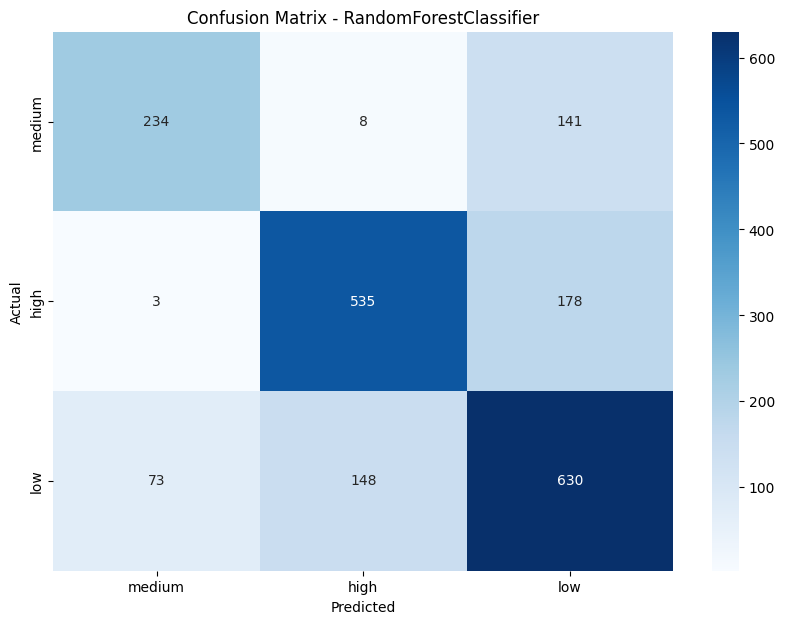


🔹 Reporte de Clasificación:
               precision    recall  f1-score   support

      medium       0.75      0.61      0.68       383
        high       0.77      0.75      0.76       716
         low       0.66      0.74      0.70       851

    accuracy                           0.72      1950
   macro avg       0.73      0.70      0.71      1950
weighted avg       0.72      0.72      0.72      1950

✅ Resultados del Mejor Random Forest: {'Accuracy': 0.7174358974358974, 'Precision': 0.7222570645396289, 'Recall': 0.7174358974358974, 'F1-Score': 0.717361739421441}


In [11]:

# Definir los hiperparámetros a buscar
param_grid = {
    "n_estimators": [100, 200, 500],  # Número de árboles
    "max_depth": [10, 20, None],  # Profundidad máxima
    "min_samples_split": [2, 5, 10],  # Min muestras para dividir
    "min_samples_leaf": [1, 2, 4]  # Min muestras en cada hoja
}

# Configurar GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                           param_grid, cv=3, scoring="accuracy", n_jobs=-1, verbose=2)

# Entrenar el modelo optimizado
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"✅ Mejores hiperparámetros: {best_params}")

# Evaluar el modelo optimizado
best_rf = grid_search.best_estimator_
results_best_rf = evaluate_model(best_rf, X_test, y_test, labels=labels)
print("✅ Resultados del Mejor Random Forest:", results_best_rf)